<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка" data-toc-modified-id="Загрузка-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Исследование-данных" data-toc-modified-id="Исследование-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование данных</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследовательский анализ</a></span><ul class="toc-item"><li><span><a href="#Распределение-признаков" data-toc-modified-id="Распределение-признаков-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Распределение признаков</a></span></li><li><span><a href="#Графики" data-toc-modified-id="Графики-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Графики</a></span></li></ul></li></ul></li><li><span><a href="#Формирование-датасета-для-обучения" data-toc-modified-id="Формирование-датасета-для-обучения-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Формирование датасета для обучения</a></span><ul class="toc-item"><li><span><a href="#Сформируем-датасет" data-toc-modified-id="Сформируем-датасет-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Сформируем датасет</a></span></li><li><span><a href="#Корреляция-признаков" data-toc-modified-id="Корреляция-признаков-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Корреляция признаков</a></span></li></ul></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение модели</a></span></li><li><span><a href="#Сравнение-прогнозируемых-меток-с-истинными" data-toc-modified-id="Сравнение-прогнозируемых-меток-с-истинными-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Сравнение прогнозируемых меток с истинными</a></span></li><li><span><a href="#Анализ-важности-признаков" data-toc-modified-id="Анализ-важности-признаков-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Анализ важности признаков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Предсказать вероятность покупки в течение 90 дней

Интернет-магазин собирает историю покупателей, проводит рассылки предложений и
планирует будущие продажи. Для оптимизации процессов надо выделить пользователей,
которые готовы совершить покупку в ближайшее время.


**Цель**
- Предсказать вероятность покупки в течение 90 дней

**Данные**


**apparel-purchases** - история покупок
- ● client_id идентификатор пользователя
- ● quantity количество товаров в заказе
- ● price цена товара
- ● category_ids вложенные категории, к которым отнсится товар
- ● date дата покупки
- ● message_id идентификатор сообщения из рассылки

**apparel-messages** - история рекламных рассылок
- ● bulk_campaign_id идентификатор рекламной кампании
- ● client_id идентификатор пользователя
- ● message_id идентификатор сообщений
- ● event тип действия
- ● channel канал рассылки
- ● date дата рассылки
- ● created_at точное время создания сообщения

**apparel-target_binary** - совершит ли клиент покупку в течение следующих 90 дней
- ● client_id идентификатор пользователя
- ● target целевой признак

## Загрузка данных

### Загрузка 

In [10]:
#import shap

In [11]:
#Загрузим библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Библиотека для визуализации матрицы корреляции
from phik import phik_matrix

# Библиотека для машинного обучения
from sklearn.model_selection import train_test_split

# загружаем класс pipeline
from sklearn.pipeline import Pipeline

# загружаем классы для подготовки данных
from sklearn.preprocessing import (OneHotEncoder,
                                   OrdinalEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   RobustScaler)
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


# загружаем функцию для работы с метриками
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_error,
                             confusion_matrix,
                             accuracy_score,
                             precision_score,
                             recall_score,
                             r2_score,
                             roc_auc_score, f1_score
                            )

# импортируем класс RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# загружаем нужные модели
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [12]:
#Скроем уведомления
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [13]:
#Применим настройки отображения данных
# текст в ячейке отражался полностью вне зависимости от длины 
#все числа отражались с двумя знаками после запятой;
pd.set_option('display.max_colwidth', None)
# все числа отражались с двумя знаками после запятой;
pd.set_option('display.float_format', '{:.2f}'.format)

In [14]:
#Загружаем данные методом read_csv
try:
    app_purchases = pd.read_csv('/datasets/apparel-purchases.csv')
except:
    app_purchases = pd.read_csv('apparel-purchases.csv')

In [15]:
#Загружаем данные методом read_csv
try:
    app_messages = pd.read_csv('/datasets/apparel-messages.csv')
except:
    app_messages = pd.read_csv('apparel-messages.csv')

In [16]:
#Загружаем данные методом read_csv
try:
    app_target = pd.read_csv('/datasets/apparel-target_binary.csv')
except:
    app_target = pd.read_csv('apparel-target_binary.csv')

In [17]:
#Посмотрим первый 5 строк данных
app_purchases.head(5)

,client_id,quantity,price,category_ids,date,message_id
0,1515915625468169594,1,1999.00,"['4', '28', '57', '431']",2022-05-16,1515915625468169594-4301-627b661e9736d
1,1515915625468169594,1,2499.00,"['4', '28', '57', '431']",2022-05-16,1515915625468169594-4301-627b661e9736d
2,1515915625471138230,1,6499.00,"['4', '28', '57', '431']",2022-05-16,1515915625471138230-4437-6282242f27843
3,1515915625471138230,1,4999.00,"['4', '28', '244', '432']",2022-05-16,1515915625471138230-4437-6282242f27843
4,1515915625471138230,1,4999.00,"['4', '28', '49', '413']",2022-05-16,1515915625471138230-4437-6282242f27843


In [18]:
#Посмотрим информацию о содержании столбцов в наших данных
app_purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202208 entries, 0 to 202207
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   client_id     202208 non-null  int64  
 1   quantity      202208 non-null  int64  
 2   price         202208 non-null  float64
 3   category_ids  202208 non-null  object 
 4   date          202208 non-null  object 
 5   message_id    202208 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 9.3+ MB


In [19]:
#Посмотрим первый 5 строк данных
app_messages.head(5)

,bulk_campaign_id,client_id,message_id,event,channel,date,created_at
0,4439,1515915625626736623,1515915625626736623-4439-6283415ac07ea,open,email,2022-05-19,2022-05-19 00:14:20
1,4439,1515915625490086521,1515915625490086521-4439-62834150016dd,open,email,2022-05-19,2022-05-19 00:39:34
2,4439,1515915625553578558,1515915625553578558-4439-6283415b36b4f,open,email,2022-05-19,2022-05-19 00:51:49
3,4439,1515915625553578558,1515915625553578558-4439-6283415b36b4f,click,email,2022-05-19,2022-05-19 00:52:20
4,4439,1515915625471518311,1515915625471518311-4439-628341570c133,open,email,2022-05-19,2022-05-19 00:56:52


In [20]:
#Посмотрим информацию о содержании столбцов в наших данных
app_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12739798 entries, 0 to 12739797
Data columns (total 7 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   bulk_campaign_id  int64 
 1   client_id         int64 
 2   message_id        object
 3   event             object
 4   channel           object
 5   date              object
 6   created_at        object
dtypes: int64(2), object(5)
memory usage: 680.4+ MB


In [21]:
#Посмотрим первый 5 строк данных
app_target.head(5)

,client_id,target
0,1515915625468060902,0
1,1515915625468061003,1
2,1515915625468061099,0
3,1515915625468061100,0
4,1515915625468061170,0


In [22]:
#Посмотрим информацию о содержании столбцов в наших данных
app_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49849 entries, 0 to 49848
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   client_id  49849 non-null  int64
 1   target     49849 non-null  int64
dtypes: int64(2)
memory usage: 779.0 KB


### Промежуточный вывод

**app_purchases**

202208 - записей, явных пропусков нет

**app_messages**

12739798 записей

**app_target**
49849 записей

##  Исследование данных

In [23]:
# Список датафреймов
dataframes = [app_purchases, app_messages, app_target]

###  Обзор данных

Убедимся, что все client_id из датафрейма с тагретом есть в датафрейме с покупками и акциями

In [24]:
# подсчёт уникальных клиентов
for idx, df in enumerate(dataframes, start=1):
    num_client = df['client_id'].nunique()
    print(f"Количество клиентов {idx}: {num_client}")

Количество клиентов 1: 49849
Количество клиентов 2: 53329
Количество клиентов 3: 49849


В датафрейме с акциями явно больше  клиентов, удалим всех клиентов, которых нет в таргете

In [25]:
#  список клиентов
clients = app_target['client_id'].unique().tolist()

In [26]:
# Удалим клиентов, о которых у нас нет данных таргета app_purchases и app_messages
app_purchases = app_purchases[app_purchases['client_id'].isin(clients)]
app_messages = app_messages[app_messages['client_id'].isin(clients)]

In [27]:
# подсчёт явных дубликатов
for idx, df in enumerate(dataframes, start=1):
    num_duplicates = df.duplicated().sum()
    print(f"Количество явных дубликатов в датафрейме {idx}: {num_duplicates}")

Количество явных дубликатов в датафрейме 1: 73020
Количество явных дубликатов в датафрейме 2: 48610
Количество явных дубликатов в датафрейме 3: 0


app_purchases содержит подозрительно много явных дубликатов, посмотрим на них.
app_messages - удалим дубликаты

In [28]:
# Удалим дубликаты
app_messages.drop_duplicates(keep='first')

,bulk_campaign_id,client_id,message_id,event,channel,date,created_at
0,4439,1515915625626736623,1515915625626736623-4439-6283415ac07ea,open,email,2022-05-19,2022-05-19 00:14:20
1,4439,1515915625490086521,1515915625490086521-4439-62834150016dd,open,email,2022-05-19,2022-05-19 00:39:34
2,4439,1515915625553578558,1515915625553578558-4439-6283415b36b4f,open,email,2022-05-19,2022-05-19 00:51:49
3,4439,1515915625553578558,1515915625553578558-4439-6283415b36b4f,click,email,2022-05-19,2022-05-19 00:52:20
4,4439,1515915625471518311,1515915625471518311-4439-628341570c133,open,email,2022-05-19,2022-05-19 00:56:52
...,...,...,...,...,...,...,...
12739793,14657,1515915625477497874,1515915625477497874-14657-65cdd371cc86c,open,email,2024-02-15,2024-02-15 23:51:40
12739794,14657,1515915625765994334,1515915625765994334-14657-65cdd36018eac,open,email,2024-02-15,2024-02-15 23:52:20
12739795,14641,1515915625545014677,1515915625545014677-14641-65cb2434b25a1,open,email,2024-02-15,2024-02-15 23:52:40
12739796,14624,1515915625477497874,1515915625477497874-14624-65c5e22fb401e,open,email,2024-02-15,2024-02-15 23:58:40


In [29]:
duplicates_purchases = app_purchases[app_purchases.duplicated()]
duplicates_purchases.head(15)

,client_id,quantity,price,category_ids,date,message_id
12,1515915625491869271,2,599.00,"['4', '27', '350', '1392']",2022-05-16,1515915625491869271-2090-61a72488d6a0f
22,1515915625566606509,1,299.00,"['5562', '5634', '5579', '710']",2022-05-16,1515915625566606509-4301-627b66245401d
42,1515915625468070175,1,2199.00,"['4', '27', '142', '496']",2022-05-17,1515915625468070175-4439-6283414668daa
59,1515915625468126078,1,1499.00,"['4', '28', '275', '421']",2022-05-17,1515915625468126078-4439-6283411f7c0cc
62,1515915625468141317,1,49.00,"['4', '27', '38', '481']",2022-05-17,1515915625468141317-4439-6283412e01078
63,1515915625468141317,1,49.00,"['4', '27', '38', '481']",2022-05-17,1515915625468141317-4439-6283412e01078
79,1515915625468178854,1,1499.00,"['4', '28', '275', '421']",2022-05-17,1515915625468178854-4439-62834151a12f2
88,1515915625468221626,1,1999.00,"['2', '18', '212', '726']",2022-05-17,1515915625468221626-4439-628341394ee14
104,1515915625471111919,1,79.00,"['2', '17', '173', '1598']",2022-05-17,1515915625471111919-4439-62834130b5e38
106,1515915625471143578,1,1799.00,"['4', '28', '260', '420']",2022-05-17,1515915625471143578-4439-6283415a428e4


В основном продукты в количестве по 1. Возможно каждая позиция записывается отдельно. Не будем удалять дублтикаты в этом датафрейме

In [30]:
# Список со столбцами датафрейма, не содержащими цифр
# cat_col_names = app_messages.select_dtypes(exclude='number').columns.tolist()
cat_col_names = ['event', 'channel']

In [31]:
# Список уникальных значений столбцов
for col in cat_col_names:
        print(app_messages[col].unique())

['open' 'click' 'purchase' 'send' 'unsubscribe' 'hbq_spam' 'hard_bounce'
 'soft_bounce' 'subscribe' 'complain' 'close']
['email' 'mobile_push']


Дубликатов не наблюдаем

In [32]:
# Список со столбцами датафрейма, не содержащими цифр
#cat_col_names = app_purchases.select_dtypes(exclude='number').columns.tolist()
cat_col_names = ['category_ids']

In [33]:
# Список уникальных значений столбцов
for col in cat_col_names:
        print(app_purchases[col].unique())

["['4', '28', '57', '431']" "['4', '28', '244', '432']"
 "['4', '28', '49', '413']" "['2', '18', '258', '441']"
 "['2', '18', '341', '1311']" "['2', '18', '123', '451']"
 "['5562', '5631', '5549', '667']" "['5562', '5630', '5649', '678']"
 "['4', '27', '350', '1392']" "['4', '28', '44', '490']"
 "['2', '18', '267', '443']" "['4', '28', '213', '417']"
 "['5562', '5589', '5584', '1786']" "['5562', '5589', '5584', '1795']"
 "['5562', '5630', '5699', '550']" "['5562', '5634', '5579', '710']"
 "['5562', '5634', '5568', '957']" "['5562', '5634', '5693', '636']"
 "['2', '18', '344', '445']" "['4', '27', '353', '840']"
 "['4', '28', '343', '425']" "['4', '31', '326', '505']"
 "['4', '28', '260', '420']" "['5562', '5631', '5622', '560']"
 "['5562', '5631', '5549', '608']" "['4', '28', '290', '424']"
 "['2', '18', '212', '658']" "['4', '27', '142', '496']"
 "['4', '28', '213', '436']" "['4', '28', '275', '421']"
 "['4', '28', '340', '1312']" "['4', '28', '156', '416']"
 "['4', '27', '181', '464'

category_ids - списки идентификаторов, к каким категориям относится товар. Часто
это вложенные категории (например автотовары-аксессуары-освежители), но также может
включать в начале списка маркер распродажи или маркер женщинам/мужчинам.
Нумерация категорий сквозная для всех уровней, то есть 44 на второй позиции списка
или на третьей – это одна и та же категория. Иногда дерево категорий обновляется, поэтому
могут меняться вложенности, например ['4', '28', '44', '1594'] или ['4', '44', '1594']. Как
обработать такие случаи – можете предлагать свои варианты решения.

Для этого проекта оставлю только первый идентификатор, посмотрю влияет ли он на итоговые покупки. Жаль нет понимание ккой идентификатор характеризует скидку

In [34]:
# Сохранение только первого значения категории

app_purchases['category_ids'] = app_purchases['category_ids'].apply(ast.literal_eval)
app_purchases['first_category'] = app_purchases['category_ids'].apply(lambda x: x[0] if x else None)

In [35]:
app_purchases.head(1)

,client_id,quantity,price,category_ids,date,message_id,first_category
0,1515915625468169594,1,1999.00,"[4, 28, 57, 431]",2022-05-16,1515915625468169594-4301-627b661e9736d,4


In [36]:
#Изменим тип данных столбца 
app_purchases['category_ids'] = app_purchases['category_ids'].astype(str)

In [37]:
# Преобразование типов данных
app_purchases['date'] = app_purchases['date'].astype('datetime64')
app_messages['date'] = app_messages['date'].astype('datetime64')

<ipython-input-37-cd25b620596e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_messages['date'] = app_messages['date'].astype('datetime64')


In [38]:
app_purchases_last_90_day = app_purchases.query('date > "2024-04-11"')

In [39]:
app_messages.dtypes

bulk_campaign_id             int64
client_id                    int64
message_id                  object
event                       object
channel                     object
date                datetime64[ns]
created_at                  object
dtype: object

###  Исследовательский анализ

Сначала посмотри на распределение таргета

In [40]:
# Сгруппируем по таргету
app_target.pivot_table(index='target', values='client_id', aggfunc='count')

,client_id
target,
0,48888
1,961


Дисбаланс классов( 

In [41]:
#Посмотрим на даты наших данных
min_date_purchases = app_purchases['date'].min()
max_date_purchases = app_purchases['date'].max()
print(f'Минимальная {min_date_purchases} и максимальная дата {max_date_purchases} покупок')

Минимальная 2022-05-16 00:00:00 и максимальная дата 2024-02-16 00:00:00 покупок


In [42]:
#Посмотрим на даты наших данных
min_date_messages = app_messages['date'].min()
max_date_messages = app_messages['date'].max()
print(f'Минимальная {min_date_messages} и максимальная дата {max_date_messages} рекламных акция')

Минимальная 2022-05-19 00:00:00 и максимальная дата 2024-02-15 00:00:00 рекламных акция


Данные почти что за два года о покупках и акциях

#### Распределение признаков

In [43]:
#Распределение признаков
app_purchases[['quantity', 'price']].describe()

,quantity,price
count,202208.00,202208.00
mean,1.01,1193.30
std,0.18,1342.25
min,1.00,1.00
25%,1.00,352.00
50%,1.00,987.00
75%,1.00,1699.00
max,30.00,85499.00


В основном все товары в количестве по 1 штуке.

Максимальная цена сильно уходит за третью квартиль.

Посмотрим на дорогие товары и товары в количестве более 1

In [44]:
app_purchases.query('quantity > 3').pivot_table(index='category_ids', values='client_id', aggfunc='count').sort_values(by='client_id', ascending=False)

,client_id
category_ids,
"['5562', '5597', '5691', '889']",15
"['6060', '6058', '6067', '5498']",8
"['4', '1822', '1821', '1815']",2
"['4', '1822', '1821', '1613']",2
"['4', '1822', '5985', '476']",1
"['4', '27', '1828', '1572']",1
"['4', '27', '205', '650']",1
"['5562', '5589', '5588', '1782']",1
"['5562', '5589', '5624', '1687']",1


In [45]:
app_purchases.pivot_table(index='quantity', values='client_id', aggfunc='count').sort_values(by='client_id', ascending=False)

,client_id
quantity,
1,201323
2,751
3,94
4,12
6,5
10,4
5,3
15,3
20,3


In [46]:
app_purchases = app_purchases.query('quantity < 3')

Клиентов купивших товар с большим количеством очень мало. Удалим товары с большим количестовом quantity

In [47]:
app_purchases.query('price > 30000')

,client_id,quantity,price,category_ids,date,message_id,first_category
6018,1515915625692218402,1,48499.00,"['4', '29', '312', '1576']",2022-06-01,1515915625489907961-4679-62972222453b3,4
70064,1515915625490563372,1,31999.00,"['4', '29', '312', '1576']",2022-12-20,1515915625490563372-8813-63a1acf4d6e83,4
138818,1515915625971673322,1,53499.00,"['4', '29', '310', '1577']",2023-06-13,1515915625971673322-13342-648873c693815,4
151607,1515915625487894579,1,31080.00,"['4', '29', '310', '1577']",2023-07-03,1515915625487894579-13427-649e839ea11d7,4
151608,1515915625487894579,1,31080.00,"['4', '29', '310', '1577']",2023-07-03,1515915625487894579-13427-649e839ea11d7,4
166576,1515915625776653984,1,63499.00,"['4', '29', '310', '1577']",2023-08-26,1515915625776653984-13719-64e85f9332bc8,4
166577,1515915625776653984,1,35559.00,"['4', '29', '310', '1577']",2023-08-26,1515915625776653984-13719-64e85f9332bc8,4
166578,1515915625776653984,1,60200.00,"['4', '29', '310', '1577']",2023-08-26,1515915625776653984-13719-64e85f9332bc8,4
171434,1515915625959777467,1,43999.00,"['4', '29', '313', '1574']",2023-09-27,1515915625959777467-13868-6513cbb257da6,4
171435,1515915625959777467,1,48499.00,"['4', '29', '313', '1574']",2023-09-27,1515915625959777467-13868-6513cbb257da6,4


In [48]:
app_messages.columns

Index(['bulk_campaign_id', 'client_id', 'message_id', 'event', 'channel',
       'date', 'created_at'],
      dtype='object')

#### Графики

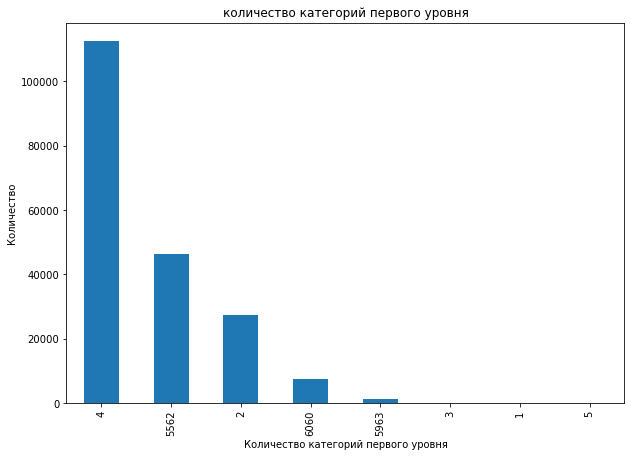

In [49]:
#Построим график распределения 'маркет_актив_тек_мес'
app_purchases['first_category'].value_counts().plot(figsize=(10,7),
                                                        title='количество категорий первого уровня',
                                                        kind='bar')

plt.xlabel('Количество категорий первого уровня')
plt.ylabel('Количество')
# Показываем график
plt.show()

Категорий первого уровня всего 8. Возможно какая-то из этих категорий обозначает товары по скидке?

In [50]:
#Столбцы с числовыми данными
num_col_names = app_purchases.select_dtypes(include='number').columns.tolist()
num_col_names = ['quantity', 'price']

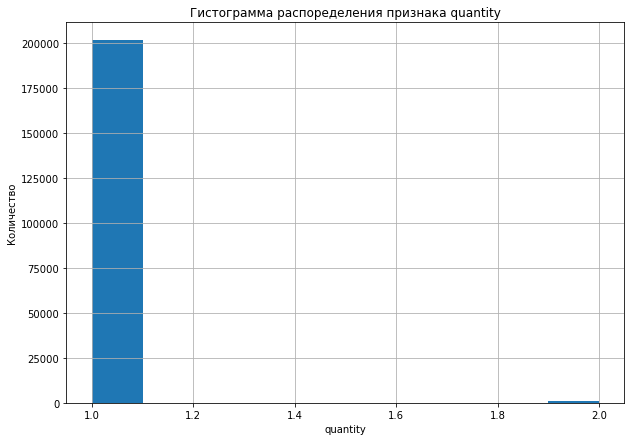

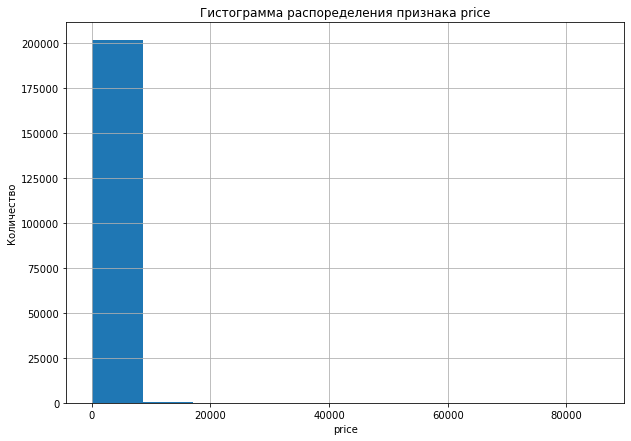

In [51]:
for cat in num_col_names:
    app_purchases[cat].hist(bins= 10, figsize=(10,7))
    plt.title(f'Гистограмма распоределения признака {cat}')
    plt.xlabel( f'{cat}')
    plt.ylabel('Количество')
    plt.show()

Графики покупок соответсвуют распределению
'quantity' - большая часть даных с 1
price - большая часть данных в пределах третье квантили 1699.00

In [52]:
cat_col_names = ['event', 'channel']

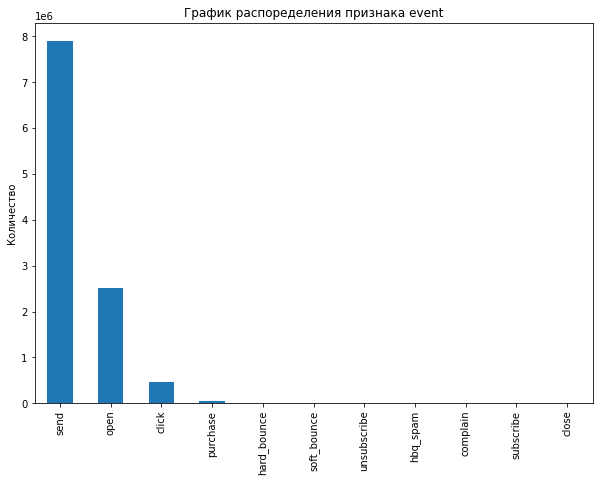

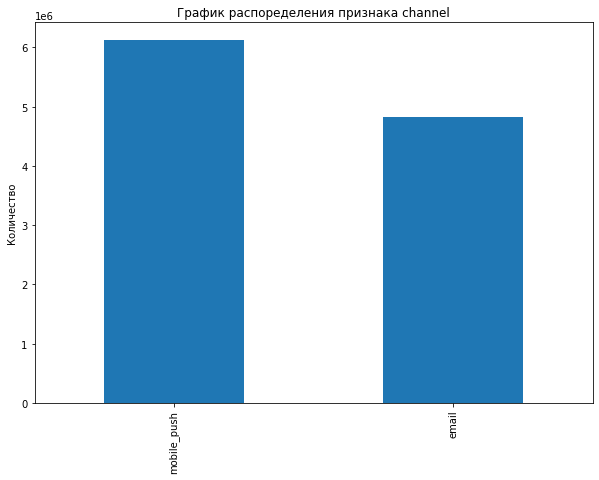

In [53]:
#Построим график распределения признаков  
for cat in cat_col_names:
    app_messages[cat].value_counts().plot(figsize=(10,7),kind='bar')
    plt.title(f'График распоределения признака {cat}')
    plt.ylabel('Количество')
    plt.show()
    print()

In [54]:
app_messages.pivot_table(index='event', values='client_id', aggfunc='count')

,client_id
event,
click,455602
close,1
complain,496
hard_bounce,16476
hbq_spam,760
open,2509367
purchase,57588
send,7899017
soft_bounce,8916


In [55]:
# Удалим close - всего одно значение
app_messages = app_messages.query("event != 'close'")

app_messages

'event' - Самые популярные события отправка и открытие, всего события click и purchase, остальные 7 событий имеют низкую долю участия в данных

'channel' - два канала, лидер пуш.

##  Формирование датасета для обучения

###   Сформируем датасет 

Сформируем датасет из признаков

In [56]:
df = app_target

In [57]:
# Общее количество купленных товаров
total_quantity = app_purchases.groupby('client_id', as_index=False)['quantity'].sum()
total_quantity.rename(columns={'quantity': 'total_quantity'}, inplace=True)
df = df.merge(total_quantity, on='client_id', how='left')

In [58]:
app_purchases_last_90_day = app_purchases.query('date > "2023-04-11"')

In [59]:
# Общее количество купленных товаров за последние  90 дней
total_quantity_90_day = app_purchases_last_90_day.groupby('client_id', as_index=False)['quantity'].sum()
total_quantity_90_day.rename(columns={'quantity': 'total_quantity_90_day'}, inplace=True)
df = df.merge(total_quantity_90_day, on='client_id', how='left')

In [60]:
# Средний прайс 
mean_price = app_purchases.groupby('client_id', as_index=False)['price'].mean()
mean_price.rename(columns={'price': 'mean_price'}, inplace=True)

# Соединение с оригинальным датафреймом по client_id
df = df.merge(mean_price, on='client_id', how='left')

In [61]:
# Средний прайс за последние  90 дней
mean_price_90_day = app_purchases_last_90_day.groupby('client_id', as_index=False)['price'].mean()
mean_price_90_day.rename(columns={'price': 'mean_price_90_day'}, inplace=True)

# Соединение с оригинальным датафреймом по client_id
df = df.merge(mean_price_90_day, on='client_id', how='left')

In [62]:
# Общее сумма купленных товаров
total_price = app_purchases.groupby('client_id', as_index=False)['price'].sum()
total_price.rename(columns={'price': 'total_price'}, inplace=True)
df = df.merge(total_price, on='client_id', how='left')

Посчитаем количестово уникальных дней, в которые клиент делал заказы, будем считать что это примерно количество уникальных заказов

In [63]:
# Общее количестово уникальных дней, в которые клиент делал заказы
unique_dates = app_purchases.groupby('client_id')['date'].nunique().reset_index()
unique_dates.rename(columns={'date': 'unique_date'}, inplace=True)
df = df.merge(unique_dates, on='client_id', how='left')

In [64]:
# Общее количестово уникальных дней, в которые клиент делал заказы _90_day
unique_dates_90_day = app_purchases_last_90_day.groupby('client_id')['date'].nunique().reset_index()
unique_dates_90_day.rename(columns={'date': 'unique_date_90_day'}, inplace=True)
df = df.merge(unique_dates_90_day, on='client_id', how='left')

In [65]:
# Количество покупок в каждой категории
pivot_categ = app_purchases.pivot_table(index='client_id', 
                                         columns='first_category', 
                                         aggfunc='size', 
                                         fill_value=0)

pivot_categ.columns = [f'cat_{col}' for col in pivot_categ.columns]
pivot_categ.reset_index(inplace=True)
df = df.merge(pivot_categ, on='client_id', how='left')

In [66]:
# Количество покупок в каждой категории за последние 90 дней
pivot_categ_90_day = app_purchases_last_90_day.pivot_table(index='client_id', 
                                         columns='first_category', 
                                         aggfunc='size', 
                                         fill_value=0)

pivot_categ_90_day.columns = [f'cat_90_day{col}' for col in pivot_categ_90_day.columns]
pivot_categ_90_day.reset_index(inplace=True)
df = df.merge(pivot_categ_90_day, on='client_id', how='left')

Добавим данные по рассылкам

In [67]:
pivot_mes = app_messages.pivot_table(index='client_id', 
                                         columns='event', 
                                         aggfunc='size', 
                                         fill_value=0)
pivot_mes.columns = [f'mes_{col}' for col in pivot_mes.columns]
pivot_mes.reset_index(inplace=True)
df = df.merge(pivot_mes, on='client_id', how='left')

In [68]:
# Замена всех значений NaN на 0
df.fillna(0, inplace=True)

In [69]:
df.head()

,client_id,target,total_quantity,total_quantity_90_day,mean_price,mean_price_90_day,total_price,unique_date,unique_date_90_day,cat_1,...,mes_click,mes_complain,mes_hard_bounce,mes_hbq_spam,mes_open,mes_purchase,mes_send,mes_soft_bounce,mes_subscribe,mes_unsubscribe
0,1515915625468060902,0,7.00,0.00,999.00,0.00,6993.00,1.00,0.00,0.00,...,10.00,0.00,0.00,0.00,35.00,5.00,126.00,0.00,0.00,1.00
1,1515915625468061003,1,7.00,0.00,2319.29,0.00,16235.00,1.00,0.00,0.00,...,6.00,0.00,0.00,0.00,5.00,1.00,154.00,0.00,0.00,0.00
2,1515915625468061099,0,1.00,0.00,299.00,0.00,299.00,1.00,0.00,0.00,...,8.00,0.00,2.00,0.00,51.00,0.00,215.00,0.00,0.00,0.00
3,1515915625468061100,0,2.00,2.00,1049.00,1049.00,2098.00,1.00,1.00,0.00,...,1.00,0.00,1.00,0.00,163.00,1.00,267.00,1.00,0.00,0.00
4,1515915625468061170,0,19.00,3.00,1768.47,999.00,33601.00,3.00,1.00,0.00,...,16.00,0.00,0.00,0.00,31.00,3.00,243.00,0.00,0.00,0.00


### Корреляция признаков

In [70]:
# Матрица Корреляции
df.corr()

,client_id,target,total_quantity,total_quantity_90_day,mean_price,mean_price_90_day,total_price,unique_date,unique_date_90_day,cat_1,...,mes_click,mes_complain,mes_hard_bounce,mes_hbq_spam,mes_open,mes_purchase,mes_send,mes_soft_bounce,mes_subscribe,mes_unsubscribe
client_id,1.00,-0.00,-0.01,0.08,0.04,0.16,-0.00,-0.08,0.17,0.00,...,-0.13,-0.01,-0.02,-0.04,-0.15,-0.09,-0.28,-0.02,-0.01,-0.03
target,-0.00,1.00,0.08,0.08,-0.03,0.01,0.04,0.11,0.10,-0.00,...,0.08,-0.00,0.01,-0.00,0.06,0.07,0.03,-0.00,0.01,-0.02
total_quantity,-0.01,0.08,1.00,0.70,-0.15,-0.01,0.53,0.51,0.31,0.04,...,0.09,-0.01,0.00,-0.01,0.02,0.40,0.01,0.01,0.01,-0.02
total_quantity_90_day,0.08,0.08,0.70,1.00,-0.13,0.18,0.34,0.28,0.63,-0.00,...,0.03,-0.01,-0.00,-0.02,-0.03,0.23,-0.05,0.00,0.01,-0.02
mean_price,0.04,-0.03,-0.15,-0.13,1.00,0.58,0.41,-0.05,-0.08,-0.00,...,-0.02,-0.00,-0.01,0.00,-0.02,-0.03,-0.03,0.00,-0.00,0.01
mean_price_90_day,0.16,0.01,-0.01,0.18,0.58,1.00,0.33,0.01,0.46,-0.00,...,-0.02,-0.01,-0.02,-0.02,-0.06,-0.02,-0.09,-0.00,-0.01,-0.02
total_price,-0.00,0.04,0.53,0.34,0.41,0.33,1.00,0.37,0.18,0.01,...,0.06,-0.01,-0.00,-0.01,0.01,0.28,-0.01,0.00,0.00,-0.01
unique_date,-0.08,0.11,0.51,0.28,-0.05,0.01,0.37,1.00,0.37,0.04,...,0.28,-0.00,-0.00,-0.01,0.07,0.53,0.05,0.00,0.02,-0.01
unique_date_90_day,0.17,0.10,0.31,0.63,-0.08,0.46,0.18,0.37,1.00,-0.00,...,0.06,-0.01,-0.02,-0.04,-0.06,0.15,-0.09,-0.00,0.01,-0.03
cat_1,0.00,-0.00,0.04,-0.00,-0.00,-0.00,0.01,0.04,-0.00,1.00,...,0.00,-0.00,-0.00,-0.00,0.00,0.03,0.00,-0.00,-0.00,-0.00


interval columns not set, guessing: ['client_id', 'target', 'total_quantity', 'total_quantity_90_day', 'mean_price', 'mean_price_90_day', 'total_price', 'unique_date', 'unique_date_90_day', 'cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_5562', 'cat_5963', 'cat_6060', 'cat_90_day2', 'cat_90_day3', 'cat_90_day4', 'cat_90_day5', 'cat_90_day5562', 'cat_90_day5963', 'cat_90_day6060', 'mes_click', 'mes_complain', 'mes_hard_bounce', 'mes_hbq_spam', 'mes_open', 'mes_purchase', 'mes_send', 'mes_soft_bounce', 'mes_subscribe', 'mes_unsubscribe']


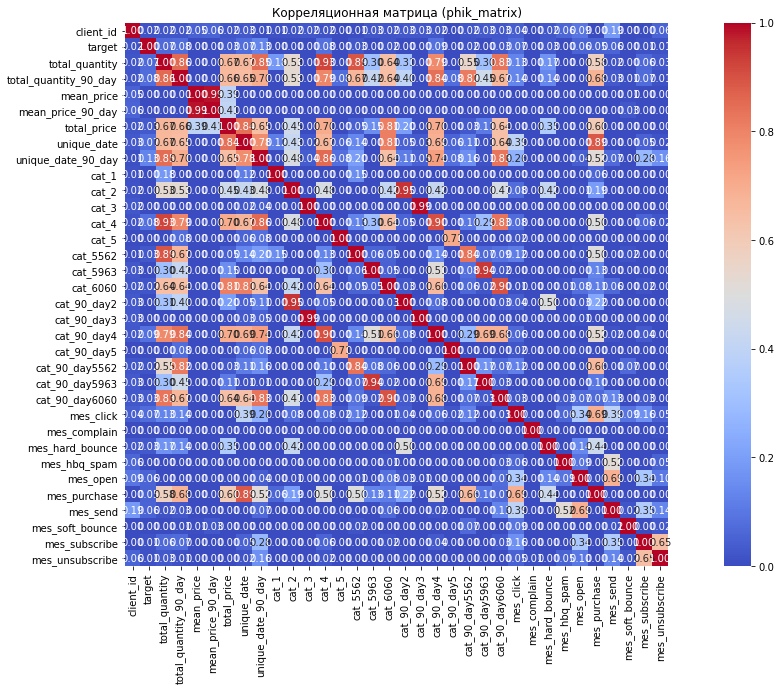

In [71]:
# Вычисляем корреляционную матрицу с помощью phik_matrix
correlation_matrix = df.phik_matrix()

# Визуализируем корреляционную матрицу
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Корреляционная матрица (phik_matrix)')
plt.show();

Сильной корреляции между признаком и таргетом не наблюдается

##  Обучение модели

In [72]:
df.columns

Index(['client_id', 'target', 'total_quantity', 'total_quantity_90_day',
       'mean_price', 'mean_price_90_day', 'total_price', 'unique_date',
       'unique_date_90_day', 'cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5',
       'cat_5562', 'cat_5963', 'cat_6060', 'cat_90_day2', 'cat_90_day3',
       'cat_90_day4', 'cat_90_day5', 'cat_90_day5562', 'cat_90_day5963',
       'cat_90_day6060', 'mes_click', 'mes_complain', 'mes_hard_bounce',
       'mes_hbq_spam', 'mes_open', 'mes_purchase', 'mes_send',
       'mes_soft_bounce', 'mes_subscribe', 'mes_unsubscribe'],
      dtype='object')

In [73]:
df = df.set_index('client_id')

In [74]:
RANDOM_STATE = 42
TEST_SIZE =0.25

X = df.drop(['target'], axis=1)
y = df['target']

# Применение Random Undersampling для борьбы с дисбалансом классов
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [75]:
df = pd.concat([X_resampled.reset_index(drop=True), y_resampled.reset_index(drop=True)], axis=1)
# Создадим новый DataFrame из сбалансированных данных
X = pd.DataFrame(X_resampled, columns=X.columns)
y = y_resampled

In [76]:
# Делим данные c cтратификацией (равномерное распределение целевого признака)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE,
    random_state = RANDOM_STATE,
    stratify = df['target']
)




#ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
#ord_columns = ['level', 'workload']
num_columns = ['total_quantity', 'total_quantity_90_day', 'mean_price',
       'mean_price_90_day', 'total_price', 'unique_date', 'unique_date_90_day',
       'cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_5562', 'cat_5963',
       'cat_6060', 'cat_90_day2', 'cat_90_day3', 'cat_90_day4', 'cat_90_day5',
       'cat_90_day5562', 'cat_90_day5963', 'cat_90_day6060', 'mes_click',
       'mes_complain', 'mes_hard_bounce', 'mes_hbq_spam', 'mes_open',
       'mes_purchase', 'mes_send', 'mes_soft_bounce', 'mes_subscribe',
       'mes_unsubscribe']


# ohe_pipe = Pipeline(
#     [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
# #     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
# #     ('ohe', OneHotEncoder(sparse=False)
#      ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)         
#         )
#     ]
# )

# ord_pipe = Pipeline(
#     [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
#      ('ord',  OrdinalEncoder(
#                 categories=[
#                     ['junior', 'middle', 'sinior'], 
#                     ['low', 'medium', 'high']
#                 ], 
#                 handle_unknown='use_encoded_value', unknown_value=np.nan
#             )
#         ),
#      ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),

#     ]
# )

data_preprocessor = ColumnTransformer([
#     [('ohe', ohe_pipe, ohe_columns),
#      ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LogisticRegression())
])
 
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 7),
        'models__max_features': range(2,7),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
]

 
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    n_jobs=-1,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE
)

In [77]:
# обучение рандомного поиска
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', round(randomized_search.best_score_, 2))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['total_quantity',
                                                   'total_quantity_90_day',
                                                   'mean_price',
                                                   'mean_price_90_day',
                                                   'total_price', 'unique_date',
                                                   'unique_date_90_day',
                                                   'cat_1', 'cat_2', 'cat_3',
                                                   'cat_4', 'cat_5', 'cat_5562',
                                                   'cat_5963', 'cat_6060',
                                                   'cat_90_day2', 'cat_90_day3',
                                                   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.62956621 0.71418389 0.61420445        nan
 0.61839463 0.64153712 0.52286871 0.5812506 ]
  warnings.warn(


In [78]:
probabilities = randomized_search.predict_proba(X_test)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой на тестовой выборке:', round(roc_auc_score(y_test, probabilities_one), 2))

Площадь ROC-кривой на тестовой выборке: 0.76


## Сравнение прогнозируемых меток с истинными

In [79]:
# Получаем лучшую модель
best_model = randomized_search.best_estimator_

# Предсказываем на тестовых данных
y_pred = best_model.predict(X_test)

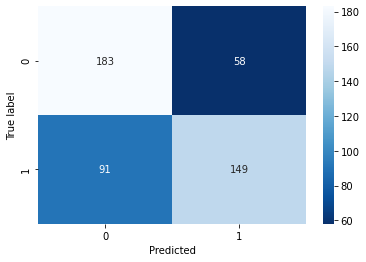

In [80]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

##  Анализ важности признаков

In [81]:
# #Преобразуем данные, что бы можно было испрользовать shap
# X_train_shape = pipe_final.named_steps['preprocessor'].fit_transform(X_train)
# X_test_shape = pipe_final.named_steps['preprocessor'].transform(X_test)

In [82]:
import shape

In [83]:
explainer = shap.LinearExplainer(randomized_search.best_estimator_.named_steps['models'], X_train_shape)
feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()
X_test_shape = pd.DataFrame(X_test_shape, columns=feature_names)
shap_values = explainer(X_test_shape)
shap.plots.beeswarm(shap_values, max_display=15)

NameError: name 'shap' is not defined

Эта часть локально не запускается(
Не могу поставить локально shap

## Вывод

Были загружены три датасета
**app_purchases** - покупки

202208 - записей, явных пропусков нет

**app_messages** - рекламные акции

12739798 записей

**app_target** - была ли совершена или нет покупка
49849 записей

В датафрейме с акциями было больше клиентов, удалили всех клиентов, которых нет в таргете
app_purchases содержал подозрительно много явных дубликатов. В основном продукты в количестве по 1. Возможно каждая позиция записывается отдельно. Не удаляли дублтикаты в этом датафрейме
app_messages - удалим дубликаты

В датафрейме с таргетом наблюдался дисбаланс классов.
Данные почти что за два года о покупках и акциях
Максимальная цена сильно уходит за третью квартиль.
Клиентов купивших товар с большим количеством очень мало. Удалили  товары с большим количестовом quantity
Категорий первого уровня всего 8. В итоговом датасете оставили только категории первого уровня
Графики покупок соответсвуют распределению 'quantity' - большая часть даных с 1 price - большая часть данных в пределах третье квантили 1699.00
'event' - Самые популярные события отправка и открытие, всего события click и purchase, остальные 7 событий имеют низкую долю участия в данных
'channel' - два канала, лидер пуш.

Был создан агрегрирующий датаесет, включающий общую сумму покупок, среднюю сумму покупок, аналогичные данные за последний квартал, кол-во покупок, данные по событиям маркетинговых акций. Сильной корреляции между признаком и таргетом не наблюдается


Был создан байплайн с борьбой с дисбалансов классов и стратификацией по таргету. Была обучена модель.
ЛУчшей оказалась модель -  LogisticRegression(C=4, penalty='l1', random_state=42, solver='liblinear'))])

Метрика лучшей модели на тренировочной выборке: 0.71
Площадь ROC-кривой на тестовой выборке: 0.76